<a href="https://colab.research.google.com/github/Felipe-Loureiro/Trainee-CIS-2024/blob/main/Per%C3%ADodo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/UnB/IEEE Computational Intelligence Society, UnB/PS 2024/período 4/creditcard.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
for col in data.columns:
  print(data[col].describe())

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64
count    2.848070e+05
mean     1.168375e-15
std      1.958696e+00
min     -5.640751e+01
25%     -9.203734e-01
50%      1.810880e-02
75%      1.315642e+00
max      2.454930e+00
Name: V1, dtype: float64
count    2.848070e+05
mean     3.416908e-16
std      1.651309e+00
min     -7.271573e+01
25%     -5.985499e-01
50%      6.548556e-02
75%      8.037239e-01
max      2.205773e+01
Name: V2, dtype: float64
count    2.848070e+05
mean    -1.379537e-15
std      1.516255e+00
min     -4.832559e+01
25%     -8.903648e-01
50%      1.798463e-01
75%      1.027196e+00
max      9.382558e+00
Name: V3, dtype: float64
count    2.848070e+05
mean     2.074095e-15
std      1.415869e+00
min     -5.683171e+00
25%     -8.486401e-01
50%     -1.984653e-02
75%      7.433413e-01
max      1.687534e+01
Name: V4, 

In [ ]:
X = data.drop('Class', axis=1).values
y = data['Class'].values

# Dividir em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar os dados (opcional, mas recomendado)


In [ ]:
def sigmoide(Z):
    return 1 / (1 + np.exp(-Z))

def relu(Z):
    return np.maximum(0, Z)

def derivada_sigmoide(Z):
    return sigmoide(Z) * (1 - sigmoide(Z))

def derivada_relu(Z):
    return np.where(Z > 0, 1, 0)

def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoide(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']

    A1 = cache['A1']
    A2 = cache['A2']

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * derivada_relu(cache['Z1'])
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(42)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

def update_parameters(parameters, grads, learning_rate):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    W1 -= learning_rate * grads['dW1']
    b1 -= learning_rate * grads['db1']
    W2 -= learning_rate * grads['dW2']
    b2 -= learning_rate * grads['db2']

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

def predict(X, parameters):
    A2, _ = forward_propagation(X, parameters)
    predictions = (A2 > 0.5).astype(int)
    return predictions

def avaliacao(predictions, y_test):
  tn = np.sum((predictions == 0) & (y_test == 0))
  fp = np.sum((predictions == 1) & (y_test == 0))
  fn = np.sum((predictions == 0) & (y_test == 1))
  tp = np.sum((predictions == 1) & (y_test == 1))

  print("True Negatives (TN):", tn)
  print("False Positives (FP):", fp)
  print("False Negatives (FN):", fn)
  print("True Positives (TP):", tp)


  precisao = tp/(tp+fp)
  especificidade = tn/(tn+fp)
  acuracia = (tp+tn)/(tp+tn+fp+fn)
  recall = tp/(tp+fn)
  f1_score = 2*(precisao*recall)/(precisao+recall)

  print("Precisão:", precisao)
  print("Especificidade:", especificidade)
  print("Acurácia:", acuracia)
  print("Recall:", recall)
  print("F1 Score:", f1_score)
  return()

def train(X, Y, n_h, epochs, learning_rate):
    n_x = X.shape[0]
    n_y = Y.shape[0]

    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(epochs):
        A2, cache = forward_propagation(X, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)

        if i % 5 == 0:
            cost = -np.mean(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
            print(f"Cost after iteration {i}: {cost}")
            avaliacao(predict(X, parameters), Y)

    return parameters

In [ ]:
parameters = train(X_train.T, y_train.reshape(1, -1), n_h=256, epochs=100, learning_rate=0.01)
predictions = predict(X_test.T, parameters)

avaliacao(predictions, y_test)

<ipython-input-8-574ed4da3dd4>:75: RuntimeWarning: divide by zero encountered in log
  cost = -np.mean(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
<ipython-input-8-574ed4da3dd4>:75: RuntimeWarning: invalid value encountered in multiply
  cost = -np.mean(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))


Cost after iteration 0: nan


<ipython-input-7-c839cf55a454>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-Z))
<ipython-input-8-574ed4da3dd4>:50: RuntimeWarning: invalid value encountered in scalar divide
  precisao = tp/(tp+fp)


True Negatives (TN): 199008
False Positives (FP): 0
False Negatives (FN): 356
True Positives (TP): 0
Precisão: nan
Especificidade: 1.0
Acurácia: 0.9982143215425051
Recall: 0.0
F1 Score: nan
Cost after iteration 5: nan
True Negatives (TN): 198919
False Positives (FP): 89
False Negatives (FN): 355
True Positives (TP): 1
Precisão: 0.011111111111111112
Especificidade: 0.9995527817977167
Acurácia: 0.9977729178788548
Recall: 0.0028089887640449437
F1 Score: 0.004484304932735426
Cost after iteration 10: 0.6689302719456037
True Negatives (TN): 198955
False Positives (FP): 53
False Negatives (FN): 355
True Positives (TP): 1
Precisão: 0.018518518518518517
Especificidade: 0.9997336790480784
Acurácia: 0.9979534921048936
Recall: 0.0028089887640449437
F1 Score: 0.004878048780487805
Cost after iteration 15: nan
True Negatives (TN): 198955
False Positives (FP): 53
False Negatives (FN): 355
True Positives (TP): 1
Precisão: 0.018518518518518517
Especificidade: 0.9997336790480784
Acurácia: 0.9979534921048

<ipython-input-8-574ed4da3dd4>:54: RuntimeWarning: invalid value encountered in scalar divide
  f1_score = 2*(precisao*recall)/(precisao+recall)


Cost after iteration 25: 0.6356784194513222
True Negatives (TN): 198985
False Positives (FP): 23
False Negatives (FN): 356
True Positives (TP): 0
Precisão: 0.0
Especificidade: 0.9998844267567133
Acurácia: 0.9980989546758693
Recall: 0.0
F1 Score: nan
Cost after iteration 30: 0.6247254464456233
True Negatives (TN): 198991
False Positives (FP): 17
False Negatives (FN): 356
True Positives (TP): 0
Precisão: 0.0
Especificidade: 0.9999145762984403
Acurácia: 0.998129050380209
Recall: 0.0
F1 Score: nan
Cost after iteration 35: 0.6156014280802914
True Negatives (TN): 198989
False Positives (FP): 19
False Negatives (FN): 356
True Positives (TP): 0
Precisão: 0.0
Especificidade: 0.999904526451198
Acurácia: 0.9981190184787625
Recall: 0.0
F1 Score: nan
Cost after iteration 40: 0.605226891638213
True Negatives (TN): 198995
False Positives (FP): 13
False Negatives (FN): 356
True Positives (TP): 0
Precisão: 0.0
Especificidade: 0.999934675992925
Acurácia: 0.9981491141831023
Recall: 0.0
F1 Score: nan
Cost

()

In [ ]:
for i in range(50):
  print(f'\n Para threshold {i/50}:\n')
  A2,_ = forward_propagation(X_test.T, parameters)
  predictions = (A2 > i/50).astype(int)
  avaliacao(predictions, y_test)



 Para threshold 0.0:

True Negatives (TN): 0
False Positives (FP): 85307
False Negatives (FN): 0
True Positives (TP): 136
Precisão: 0.0015917044111278865
Especificidade: 0.0
Acurácia: 0.0015917044111278865
Recall: 1.0
F1 Score: 0.003178349828813143

 Para threshold 0.02:

True Negatives (TN): 2
False Positives (FP): 85305
False Negatives (FN): 0
True Positives (TP): 136
Precisão: 0.0015917416696901955
Especificidade: 2.3444734898660133e-05
Acurácia: 0.0016151118289385905
Recall: 1.0
F1 Score: 0.003178424109281699

 Para threshold 0.04:

True Negatives (TN): 2
False Positives (FP): 85305
False Negatives (FN): 0
True Positives (TP): 136
Precisão: 0.0015917416696901955
Especificidade: 2.3444734898660133e-05
Acurácia: 0.0016151118289385905
Recall: 1.0
F1 Score: 0.003178424109281699

 Para threshold 0.06:

True Negatives (TN): 2
False Positives (FP): 85305
False Negatives (FN): 0
True Positives (TP): 136
Precisão: 0.0015917416696901955
Especificidade: 2.3444734898660133e-05
Acurácia: 0.001

<ipython-input-8-574ed4da3dd4>:54: RuntimeWarning: invalid value encountered in scalar divide
  f1_score = 2*(precisao*recall)/(precisao+recall)


True Negatives (TN): 85306
False Positives (FP): 1
False Negatives (FN): 136
True Positives (TP): 0
Precisão: 0.0
Especificidade: 0.9999882776325507
Acurácia: 0.9983965918799668
Recall: 0.0
F1 Score: nan

 Para threshold 0.44:

True Negatives (TN): 85306
False Positives (FP): 1
False Negatives (FN): 136
True Positives (TP): 0
Precisão: 0.0
Especificidade: 0.9999882776325507
Acurácia: 0.9983965918799668
Recall: 0.0
F1 Score: nan

 Para threshold 0.46:

True Negatives (TN): 85306
False Positives (FP): 1
False Negatives (FN): 136
True Positives (TP): 0
Precisão: 0.0
Especificidade: 0.9999882776325507
Acurácia: 0.9983965918799668
Recall: 0.0
F1 Score: nan

 Para threshold 0.48:

True Negatives (TN): 85306
False Positives (FP): 1
False Negatives (FN): 136
True Positives (TP): 0
Precisão: 0.0
Especificidade: 0.9999882776325507
Acurácia: 0.9983965918799668
Recall: 0.0
F1 Score: nan

 Para threshold 0.5:

True Negatives (TN): 85306
False Positives (FP): 1
False Negatives (FN): 136
True Positiv

<ipython-input-8-574ed4da3dd4>:50: RuntimeWarning: invalid value encountered in scalar divide
  precisao = tp/(tp+fp)


True Negatives (TN): 85307
False Positives (FP): 0
False Negatives (FN): 136
True Positives (TP): 0
Precisão: nan
Especificidade: 1.0
Acurácia: 0.9984082955888721
Recall: 0.0
F1 Score: nan


In [ ]:
data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [ ]:
len(y_ros)

398016

In [ ]:
sum(y_ros)

199008

In [ ]:
parameters = train(X_ros.T, y_ros.reshape(1, -1), n_h=256, epochs=100, learning_rate=0.01)
predictions = predict(X_test.T, parameters)

for i in range(100):
  print(f'\n Para threshold {i/100}:\n')
  A2,_ = forward_propagation(X_test.T, parameters)
  predictions = (A2 > i/100).astype(int)
  avaliacao(predictions, y_test)


<ipython-input-8-574ed4da3dd4>:75: RuntimeWarning: divide by zero encountered in log
  cost = -np.mean(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
<ipython-input-8-574ed4da3dd4>:75: RuntimeWarning: invalid value encountered in multiply
  cost = -np.mean(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))


Cost after iteration 0: nan


<ipython-input-7-c839cf55a454>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-Z))
<ipython-input-8-574ed4da3dd4>:50: RuntimeWarning: invalid value encountered in scalar divide
  precisao = tp/(tp+fp)


True Negatives (TN): 199008
False Positives (FP): 0
False Negatives (FN): 199008
True Positives (TP): 0
Precisão: nan
Especificidade: 1.0
Acurácia: 0.5
Recall: 0.0
F1 Score: nan
Cost after iteration 5: 0.6929656741663883
True Negatives (TN): 198388
False Positives (FP): 620
False Negatives (FN): 197892
True Positives (TP): 1116
Precisão: 0.6428571428571429
Especificidade: 0.9968845473548802
Acurácia: 0.501246181058048
Recall: 0.00560781476121563
F1 Score: 0.011118638664169291
Cost after iteration 10: 0.6929374264021128
True Negatives (TN): 198390
False Positives (FP): 618
False Negatives (FN): 197892
True Positives (TP): 1116
Precisão: 0.643598615916955
Especificidade: 0.9968945972021225
Acurácia: 0.5012512059816691
Recall: 0.00560781476121563
F1 Score: 0.011118749439579162
Cost after iteration 15: 0.6929115010865295
True Negatives (TN): 198384
False Positives (FP): 624
False Negatives (FN): 197892
True Positives (TP): 1116
Precisão: 0.6413793103448275
Especificidade: 0.996864447660395

<ipython-input-8-574ed4da3dd4>:54: RuntimeWarning: invalid value encountered in scalar divide
  f1_score = 2*(precisao*recall)/(precisao+recall)


True Negatives (TN): 85275
False Positives (FP): 32
False Negatives (FN): 136
True Positives (TP): 0
Precisão: 0.0
Especificidade: 0.9996248842416214
Acurácia: 0.9980337769039008
Recall: 0.0
F1 Score: nan

 Para threshold 0.53:

True Negatives (TN): 85283
False Positives (FP): 24
False Negatives (FN): 136
True Positives (TP): 0
Precisão: 0.0
Especificidade: 0.999718663181216
Acurácia: 0.9981274065751436
Recall: 0.0
F1 Score: nan

 Para threshold 0.54:

True Negatives (TN): 85286
False Positives (FP): 21
False Negatives (FN): 136
True Positives (TP): 0
Precisão: 0.0
Especificidade: 0.999753830283564
Acurácia: 0.9981625177018597
Recall: 0.0
F1 Score: nan

 Para threshold 0.55:

True Negatives (TN): 85287
False Positives (FP): 20
False Negatives (FN): 136
True Positives (TP): 0
Precisão: 0.0
Especificidade: 0.9997655526510134
Acurácia: 0.9981742214107651
Recall: 0.0
F1 Score: nan

 Para threshold 0.56:

True Negatives (TN): 85289
False Positives (FP): 18
False Negatives (FN): 136
True Pos

Epoch 1/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8140 - loss: 1625.0988
Epoch 2/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9982 - loss: 23.5509
Epoch 3/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9961 - loss: 15.9572
Epoch 4/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9981 - loss: 19.2737
Epoch 5/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9980 - loss: 8.8225
Epoch 6/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9946 - loss: 1.7436
Epoch 7/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9957 - loss: 0.5541
Epoch 8/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9957 - loss: 0.1568
Epoch 9/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9910 - loss: 19.1116
Epoch 10/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9978 - loss: 26.3455
Epoch 11/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9971 - loss: 5.8825
Epoch 12/100
195/195 ━━━━━━━━━━━━

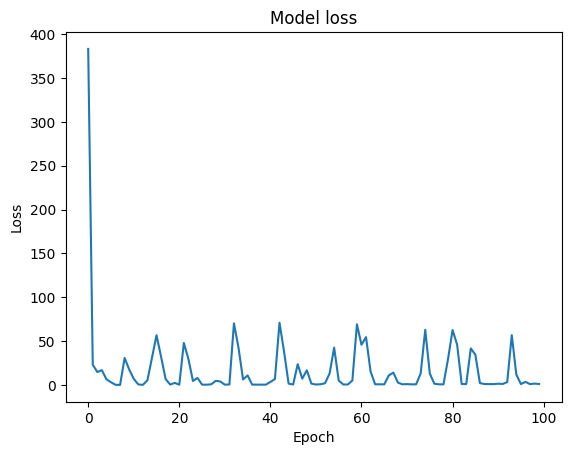

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

model = Sequential()

model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  history = model.fit(X_train, y_train, epochs=100, batch_size=1024)

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - accuracy: 0.4722 - loss: 0.7020
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8666 - loss: 0.4949 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8817 - loss: 0.3962 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8817 - loss: 0.3462
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8881 - loss: 0.3147
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8939 - loss: 0.2921
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8951 - loss: 0.2718
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9069 - loss: 0.2541
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9136 - loss: 0.2425
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9214 - loss: 0.2293
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9227 - loss: 0.2207
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9271 -

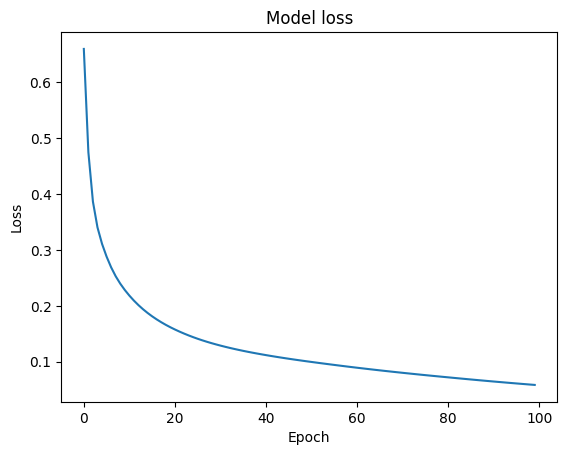

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_ros)
X_test = scaler.transform(X_test)
model = Sequential()

model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  history = model.fit(X_train, y_ros, epochs=100, batch_size=4096*20)

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

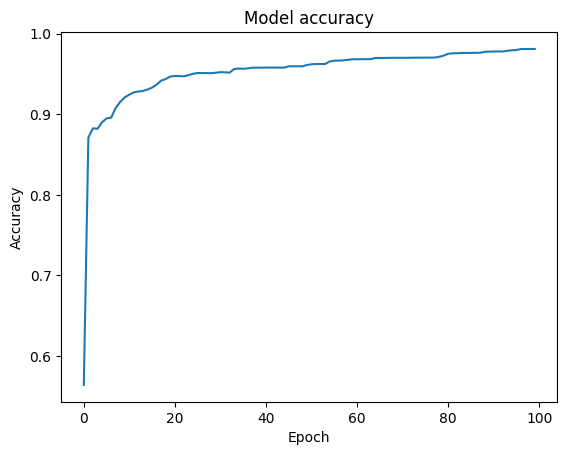

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
predictions = predictions.flatten()
predictions = (predictions > 0.5).astype(int)
classification_report = classification_report(y_test, predictions)
print(classification_report)
'''print(classificatio_report)
predictions = model.predict(X_test)
predictions = predictions.flatten()
predictions = (predictions > 0.5).astype(int)
avaliacao(predictions, y_test)'''

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85307
           1       0.10      0.93      0.19       136

    accuracy                           0.99     85443
   macro avg       0.55      0.96      0.59     85443
weighted avg       1.00      0.99      0.99     85443



'print(classificatio_report)\npredictions = model.predict(X_test)\npredictions = predictions.flatten()\npredictions = (predictions > 0.5).astype(int)\navaliacao(predictions, y_test)'

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
predictions[0][0]

1